# 0. Read File

In [19]:
# !pip install msoffcrypto-tool
# !pip install "vegafusion[embed]>=1.4.0"

In [1]:
import pandas as pd
import msoffcrypto
import io

import altair as alt
alt.data_transformers.enable('vegafusion')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

passwd = 'Capstone_2024'
path_to_data = "data/CONFIDENTIAL_SampleData_Shared-2024-05-08.xlsx"

decrypted_workbook = io.BytesIO()
with open(path_to_data, 'rb') as file:
    office_file = msoffcrypto.OfficeFile(file)
    office_file.load_key(password=passwd)
    office_file.decrypt(decrypted_workbook)

df = pd.read_excel(decrypted_workbook)

# 1. Basic EDA

In [2]:
df.head()

,Call_Created_Date,Event_Anonymizer,Grouped_Event_Type_Code_Desc,Grouped_Event_Subtype_Code_Desc,Occurrence_Type,Occurrence_Type_UCR_Category,Occurrence_Report_Category,Priority,Public_Generated_Event_Flag,Event_Attended_Flag,Event_Remarks_Text,Event_Remarks_Created_Timestamp,Remarks_Line_Order,Remarks_Line_Grouping
0,2023-01-01,202423001278,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,3,False,True,WALKTHRU,2023-01-01 00:38:54,2,0
1,2023-01-01,202423001278,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,3,False,True,SPECIAL ADDRESS COMMENT:,2023-01-01 00:39:12,0,0
2,2023-01-01,202423001280,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,3,False,True,WALKTHRU,2023-01-01 00:39:06,2,0
3,2023-01-01,202423001280,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,3,False,True,1825 41 st,2023-01-01 00:52:52,3,17768119
4,2023-01-01,202423001280,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,3,False,True,1458 IT; ADULT FML 2 CHILDREN 1825 41 ST SE;14...,2023-01-01 00:53:24,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Call_Created_Date                6000 non-null   datetime64[ns]
 1   Event_Anonymizer                 6000 non-null   int64         
 2   Grouped_Event_Type_Code_Desc     6000 non-null   object        
 3   Grouped_Event_Subtype_Code_Desc  6000 non-null   object        
 4   Occurrence_Type                  6000 non-null   object        
 5   Occurrence_Type_UCR_Category     6000 non-null   object        
 6   Occurrence_Report_Category       6000 non-null   object        
 7   Priority                         6000 non-null   int64         
 8   Public_Generated_Event_Flag      6000 non-null   bool          
 9   Event_Attended_Flag              6000 non-null   bool          
 10  Event_Remarks_Text               6000 non-null   object     

In [4]:
df.describe(include='all')

,Call_Created_Date,Event_Anonymizer,Grouped_Event_Type_Code_Desc,Grouped_Event_Subtype_Code_Desc,Occurrence_Type,Occurrence_Type_UCR_Category,Occurrence_Report_Category,Priority,Public_Generated_Event_Flag,Event_Attended_Flag,Event_Remarks_Text,Event_Remarks_Created_Timestamp,Remarks_Line_Order,Remarks_Line_Grouping
count,6000,6.000000e+03,6000,6000,6000,6000,6000,6000.000000,6000,6000,6000,6000,6.000000e+03,6.000000e+03
unique,NaN,NaN,1,2,22,7,13,NaN,2,2,4210,NaN,NaN,NaN
top,NaN,NaN,MISCELLANEOUS,X99 MISCELLANEOUS,NONE,NONE,NONE,NaN,True,False,SPECIAL ADDRESS COMMENT:,NaN,NaN,NaN
freq,NaN,NaN,6000,5998,5565,5565,5565,NaN,5714,3867,233,NaN,NaN,NaN
mean,2023-01-03 23:26:09.599999744,2.024230e+11,NaN,NaN,NaN,NaN,NaN,2.949333,NaN,NaN,NaN,2023-01-04 13:24:32.792833536,1.201001e+04,1.301847e+07
min,2023-01-01 00:00:00,2.024230e+11,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,2023-01-01 00:38:54,0.000000e+00,0.000000e+00
25%,2023-01-02 00:00:00,2.024230e+11,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2023-01-02 19:39:31.500000,0.000000e+00,0.000000e+00
50%,2023-01-04 00:00:00,2.024230e+11,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2023-01-04 12:07:59,1.000000e+00,1.777652e+07
75%,2023-01-06 00:00:00,2.024230e+11,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2023-01-06 08:51:44.249999872,4.000000e+00,1.778680e+07
max,2023-01-07 00:00:00,2.024230e+11,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2023-01-07 23:46:20,1.698184e+06,7.488783e+08


In [5]:
df['Grouped_Event_Subtype_Code_Desc'].value_counts()

Grouped_Event_Subtype_Code_Desc
X99 MISCELLANEOUS             5998
X99 MISCELLANEOUS - WEAPON       2
Name: count, dtype: int64

In [6]:
df['Occurrence_Type'].value_counts()

Occurrence_Type
NONE                                                                                            5565
COURT ORDER                                                                                      116
GENERAL INFORMATION/COMPLAINT                                                                    104
DOMESTIC INFORMATION                                                                              60
PEACE BOND                                                                                        28
FIREARM SURRENDERED                                                                               23
BOOKED-IN TO APU/CSS                                                                              15
CHILD, YOUTH AND FAMILY ENHANCEMENT ACT                                                           14
LOST PROPERTY                                                                                     14
FAILS TO COMPLY WITH SEX OFFENDER INFORMATION REGISTRATION ACT CC490.012,  

In [7]:
df['Occurrence_Report_Category'].value_counts()

Occurrence_Report_Category
NONE                   5565
Information Report      306
Domestic                 60
Other Criminal Code      23
Provincial               14
Drugs: Possession         6
Fraud                     6
B&E: Shop                 5
B&E: House                5
Federal                   4
Theft Under               3
Property Mischief         2
Drugs: Trafficking        1
Name: count, dtype: int64

In [8]:
df['Priority'].value_counts()

Priority
3    5696
2     304
Name: count, dtype: int64

In [9]:
df['Public_Generated_Event_Flag'].value_counts()

Public_Generated_Event_Flag
True     5714
False     286
Name: count, dtype: int64

# 2. Text Column EDA

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
tokenized = df['Event_Remarks_Text'].map(str).str.lower().map(word_tokenize)

In [12]:
word_counts = tokenized.map(len).value_counts().reset_index()

In [13]:
word_counts.sort_values(by='Event_Remarks_Text', ascending=True)[:20]

,Event_Remarks_Text,count
12,1,187
7,2,246
8,3,242
0,4,621
2,5,402
4,6,276
11,7,190
13,8,165
3,9,346
6,10,253


In [14]:
alt.Chart(word_counts).mark_bar().encode(
    x='Event_Remarks_Text', 
    y='count'
)

alt.Chart(...)

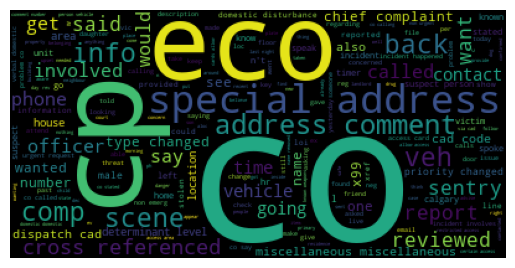

In [15]:
stopwords_set = stopwords.words("English")
stopwords_set.extend(["redacted", "police", "call", "caller", "event", "offr", "accept", "advised"])

wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(tokenized.explode()))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
df['Event_Remarks_Text'][:30]

0                                              WALKTHRU
1                              SPECIAL ADDRESS COMMENT:
2                                              WALKTHRU
3                                            1825 41 st
4     1458 IT; ADULT FML 2 CHILDREN 1825 41 ST SE;14...
5                                         End Transport
6                                        [Redacted] WIR
7                                 [Redacted] SITE W5426
8                 4637 [Redacted] TR SW CITY OF CALGARY
9     CO WITNESSED A 1084 OUTSIDE THE BACK ALLEY - C...
10     Abort reason: 6. Does Not Meet Dispatch Criteria
11    CO WAS INSIDE A TAXI CAB WHEN SHE WITNESSED TH...
12                       CO THINKS OFFR DRIVER WAS 1083
13    TAXI DRIVER PH NUMBERAND NAME IS [Redacted] UR...
14                    TIME DELAY WAS AT 0050 - 0057 HRS
15                         NO INJURIES - 2 VEH INVOLVED
16    NO DRIVERS STILL THERE - THINKS THE VIC VEH DI...
17    OFFR VEH LAST SEEN NB ON [Redacted] TR AND

In [17]:
df['Event_Remarks_Text'][13].lower()

'taxi driver ph numberand name is [redacted] ur [redacted] ... offr veh blk dodge suv was speeding and hit another veh - offr plt xxx1933;ab ...both veh were being driven when this accident occurred'

In [18]:
df[tokenized.map(len) < 10]['Event_Remarks_Text'][:50]

0                                             WALKTHRU
1                             SPECIAL ADDRESS COMMENT:
2                                             WALKTHRU
3                                           1825 41 st
5                                        End Transport
6                                       [Redacted] WIR
7                                [Redacted] SITE W5426
8                4637 [Redacted] TR SW CITY OF CALGARY
10    Abort reason: 6. Does Not Meet Dispatch Criteria
12                      CO THINKS OFFR DRIVER WAS 1083
14                   TIME DELAY WAS AT 0050 - 0057 HRS
15                        NO INJURIES - 2 VEH INVOLVED
18                            UNKN DESC OF OFFR DRIVER
19                                 VIC VEH - UNKN DESC
21                           OFFR PLT APPEARS TO MATCH
23                               1101 ADVISED TO READ.
25                                   1101 MAKE A PRI 3
29                                    [Redacted] MOB H
30        

# 3. Case Study

In this section, we try to better understand our data by randomly sample 10 cases and study their contexts.

In [30]:
path_to_data = "data/Data Definitions_2024-05-08_SRS.xlsx"
topic_df = pd.read_excel(path_to_data,sheet_name="10 Code Event (Sub)Type Map")

In [33]:
topic_df["Grouped_Event_Type_Code_Desc"].unique()

array(['911', 'ABDUCTION', 'ALARM', 'ASSAULT', 'ASSISTANCE',
       'BREAK AND ENTER', 'CHECK ON WELFARE', 'COLLISION',
       'DISPATCH CODES', 'DISTURBANCE', 'DOMESTIC', 'DRUGS',
       'ESCAPED PRISONER', 'FRAUD', 'HARASSMENT/THREATS', 'MAJOR CODES',
       'MEDICAL', 'MENTAL HEALTH', 'MISCELLANEOUS', 'MISSING PERSON',
       'NOISE', 'PROPERTY', 'ROBBERY', 'SEXUAL OFFENCES', 'SUSPICIOUS',
       'THEFT', 'TRAFFIC'], dtype=object)

In [27]:
import random

random.seed(591)
sample_id = random.sample(list(df["Event_Anonymizer"].unique()), 10)
sample_id

[202423009257,
 202423006667,
 202423008377,
 202423002971,
 202423007575,
 202423003228,
 202423002585,
 202423004092,
 202423005408,
 202423004371]

In [38]:
for id in sample_id:
    print(f"Event_Anonymizer: {id}")
    print("\n".join(df[df["Event_Anonymizer"]==id]["Event_Remarks_Text"]))
    print("\n")

Event_Anonymizer: 202423009257
Accept Advised Event:
SPECIAL ADDRESS COMMENT:
This is a restricted access area and only certain access cards allow access to this area.
EPO - Name Removed


Event_Anonymizer: 202423006667
C/O WAS PULLING INTO THE SHOPPERS WITH HIS WINDOW DOWN - HEARD A BYSTANDER YELL SOMETHING BUT DIDN'T HEAR WHAT
WHEN C/O ASKED THE BYSTANDER " WERE YOU TALKING TO ME?" THE BYSTANDER TOOK A [Redacted] OF HIS LIC PLATE AND SAID HE WAS GOING TO CALL CPS
C/O SAYS BYSTANDER IS GONE, HE DOESN'T WANT TO SEE CPS - HE JUST WANTED IT NOTED WHAT HAPPENED SO NO ONE NEEDS TO ATTEND - C/O DIDN'T WANT TO WASTE CPS TIME
AT THE TIME WHEN C/O CALLED IN, THERE WAS NO CALL FOR CPS DISPATCH
C/O WAS IN A [Redacted] [Redacted] 1500, CFY5291
9900 reviewed


Event_Anonymizer: 202423008377
as per unt
** Event 23007143 has been reopened at: 2023/01/05 19:31:51


Event_Anonymizer: 202423002971
SPECIAL ADDRESS COMMENT:
1Y52, CLEANUP
** Event Type changed from ASSISTANCE(ASSIST_OTHER_PO) to MISCELLAN

Event_Anonymizer: 202423009257
- Observations:
  1. Emergency protection order related
  2. Occurrence_Type = 
COURT ORDE
  3. Occurrence_Type_UCR_Category = 	Information Repor
  4. Public_Generated_Event_Flag = TRUE
  5. This log does not look like a call from the public yet it is recorded as one.t
- Questions
  1. Why is not there any information about the caller?E 
- Manual AnnotationCHECK ON WELFARE

Event_Anonymizer: 202423006667
- Observations:
  1. Very detailed description of the event.
- Questions:
  1. n/a
- Manual Annotation: DISTURBANCE

Event_Anonymizer: 202423008377
- Observations:
  1. I assume this call is a continuation of a previous call.
- Questions:
  1. If this is a continuation, then why is this call not grouped with the previous call?
- Manual Annotation: MISCELLANEOUS

Event_Anonymizer: 202423002971
- Observations:
  1. The event is not very clearly described.
  2. I guess it has to do with evacuating 5 campers from a place. 
- Questions:
  1. Why does the ECO change the event type from ASSISTANCE(ASSIST_OTHER_PO) to MISCELLANEOUS(MISCELLANEOUS)?
  2. What does CR10 stands for?
  3. Does BYLAW mean Bylaw officer?
- Manual Annotation: 

Event_Anonymizer: 202423007575
- Observations:
  1. Too little information or all information are sensitive.
- Questions:
  1. 
- Manual Annotation: MISCELLANEOUS

Event_Anonymizer: 202423003228
- Observations:
  1. 
- Questions:
  1. 
- Manual Annotation: MISSING PERSON / MISCELLANEOUS

Event_Anonymizer: 202423002585
- Observations:
  1. Another emergency protection order related event.
- Questions:
  1. Does all events of this kind share the same log format?
- Manual Annotation: CHECK ON WELFARE

Event_Anonymizer: 202423004092
- Observations:
  1. 
- Questions:
  1. What is an ML?
  2. 
- Manual Annotation: MISCELLANEOUS

Event_Anonymizer: 202423005408
- Observations:
  1. It seems like if the chief complaint is resolved, the event type will be de-escalated into miscellaneous.
- Questions:
  1. Is there a reason why the ECO has to reclassify the event type to miscellaneous even if the complaint is resolved?
- Manual Annotation: Verbal DOMESTIC DISTURBANCE

Event_Anonymizer: 202423004371
- Observations:
  1. too little information.
  2. Public_Generated_Event_Flag = False
- Questions:
  1. Why does a police officer have to report picking up footage through an emergency call?
- Manual Annotation: MISCELLANEOUS: 